In [76]:
import numpy as np
import imageio as io
import matplotlib.pyplot as plt

In [49]:
stack = io.volread('../data/marta/sst_cre_to_E/stacks/10032022/cell1_sst_multigrid_stack10_00001.tif')
stack_grn, stack_red = [stack[i::2] for i in range(2)]
num_planes = 11
imred = np.array([np.mean(stack_red[i::num_planes], axis=0) for i in range(num_planes)]).astype(int)
imgrn = np.array([np.mean(stack_grn[i::num_planes], axis=0) for i in range(num_planes)]).astype(int)

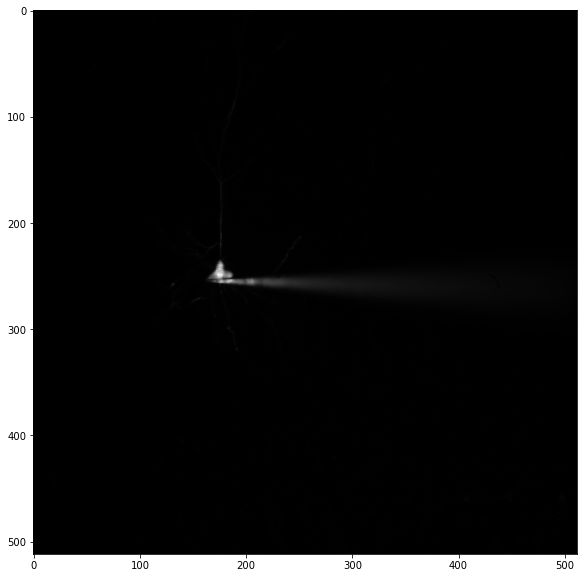

In [74]:
plt.figure(figsize=(10,10))


plt.imshow(imgrn[-2], cmap='gray')

# image from marcus for pv 0316


In [146]:
from imageio import imread
stack_new = imread('../data/marta/pv_cre_to_E/stacks/03162022/AVG_cell1_pv_multigrid25_00002.tif - C=0 #2 #3.png')
results = np.load('../scripts/220316_cell1_multigrid_PV_A_planes_cmReformat_subtractr_caviar_results.npz', allow_pickle=True)

/tmp/ipykernel_254104/1110656460.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  stack_new = imread('../data/marta/pv_cre_to_E/stacks/03162022/AVG_cell1_pv_multigrid25_00002.tif - C=0 #2 #3.png')


In [147]:
weights = results['model_state'].item()['mu']
targets_binarized = results['targets'][weights > 0,:]

im_tmp = stack_new.copy()
im_tmp[im_tmp > 33000] = 33000

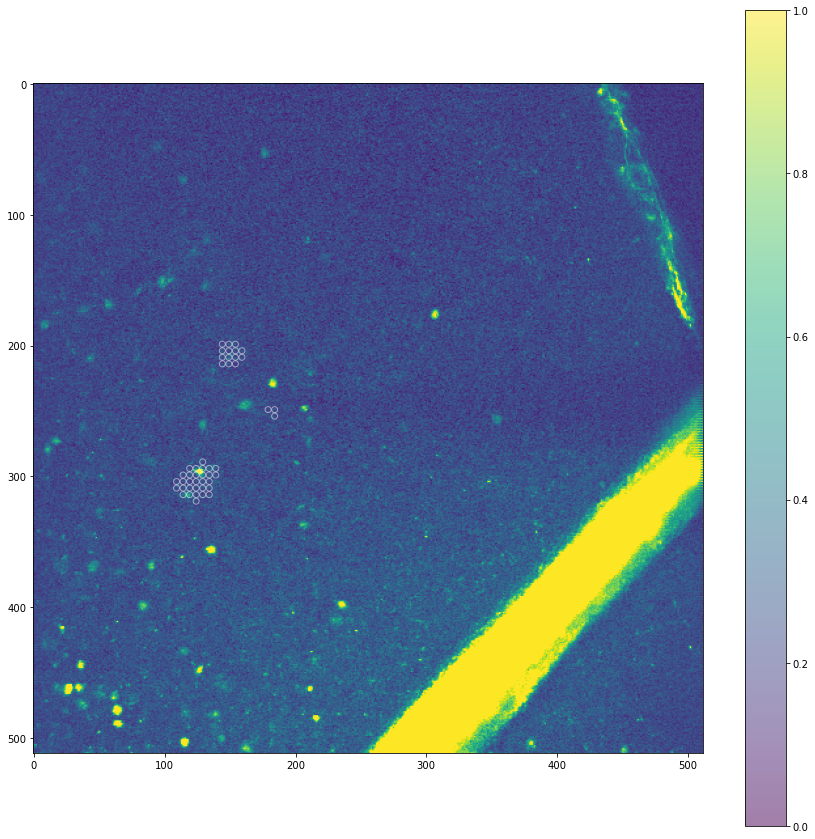

In [150]:
plt.figure(figsize=(15,15))
plt.imshow(im_tmp)
plt.scatter(targets_binarized[:,1], targets_binarized[:,0], alpha=0.5, edgecolor='white', facecolor='None')
plt.colorbar()